In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("credits.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encode=LabelEncoder()
data['type']=label_encode.fit_transform(data['type'])
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Transaction Amount')

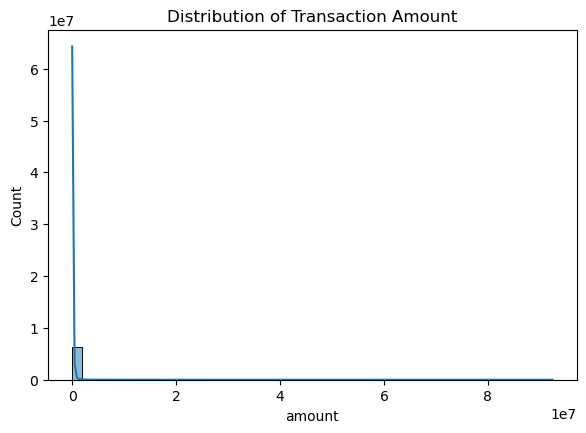

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(data["amount"],bins=50,kde=True)
plt.title("Distribution of Transaction Amount")

Text(0.5, 1.0, 'Transaction Type Distribution')

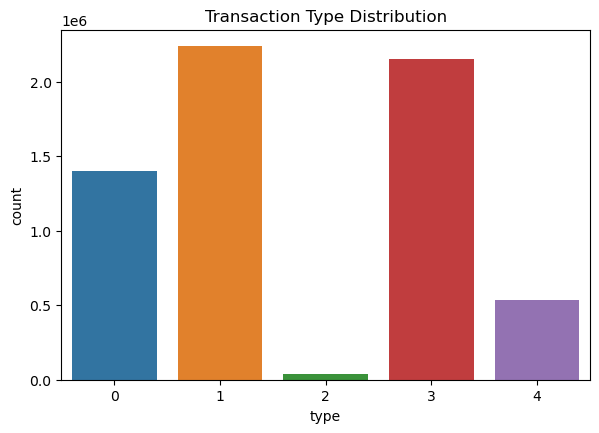

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.countplot(x="type",data=data)
plt.title("Transaction Type Distribution")

Text(0.5, 1.0, 'Fraud vs Non-Fraud Transactions')

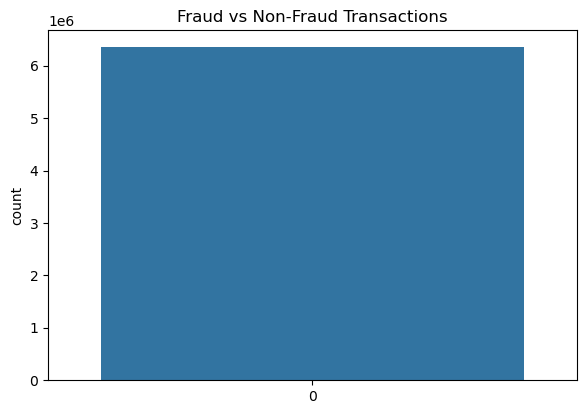

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
sns.countplot(data['isFraud'])
plt.title("Fraud vs Non-Fraud Transactions")

C:\Users\vvsna\AppData\Local\Temp\ipykernel_5368\2735000890.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=data.corr()


Text(0.5, 1.0, 'Correlation Matrix')

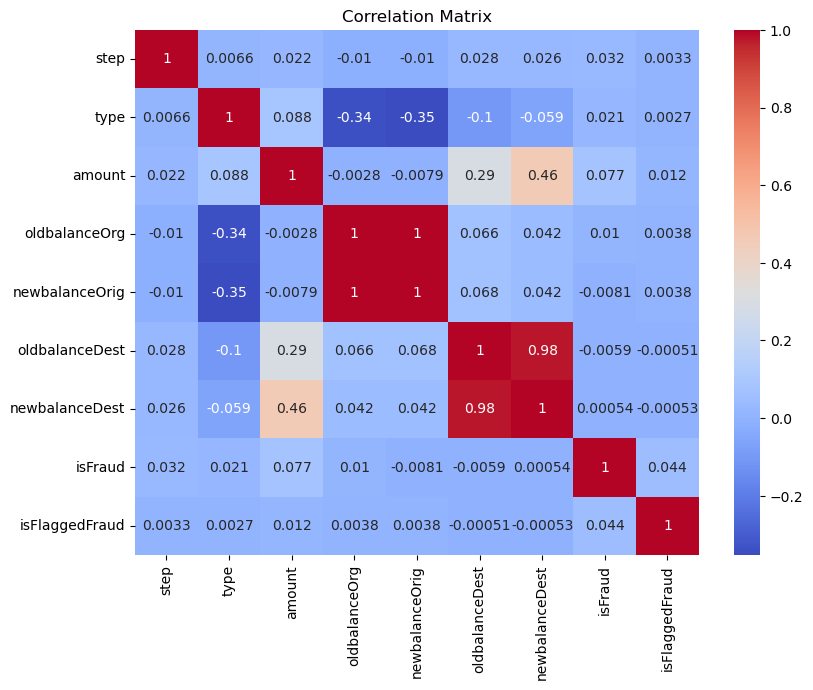

In [14]:
plt.figure(figsize=(20,15))
corr_mat=data.corr()
plt.subplot(2,2,4)
sns.heatmap(corr_mat,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")

In [15]:
fraud_data=data[data["isFraud"]==1]
non_fraud_data=data[data["isFraud"]==0]

Text(0.5, 1.0, 'Distribution of Transaction Amount (Fraud)')

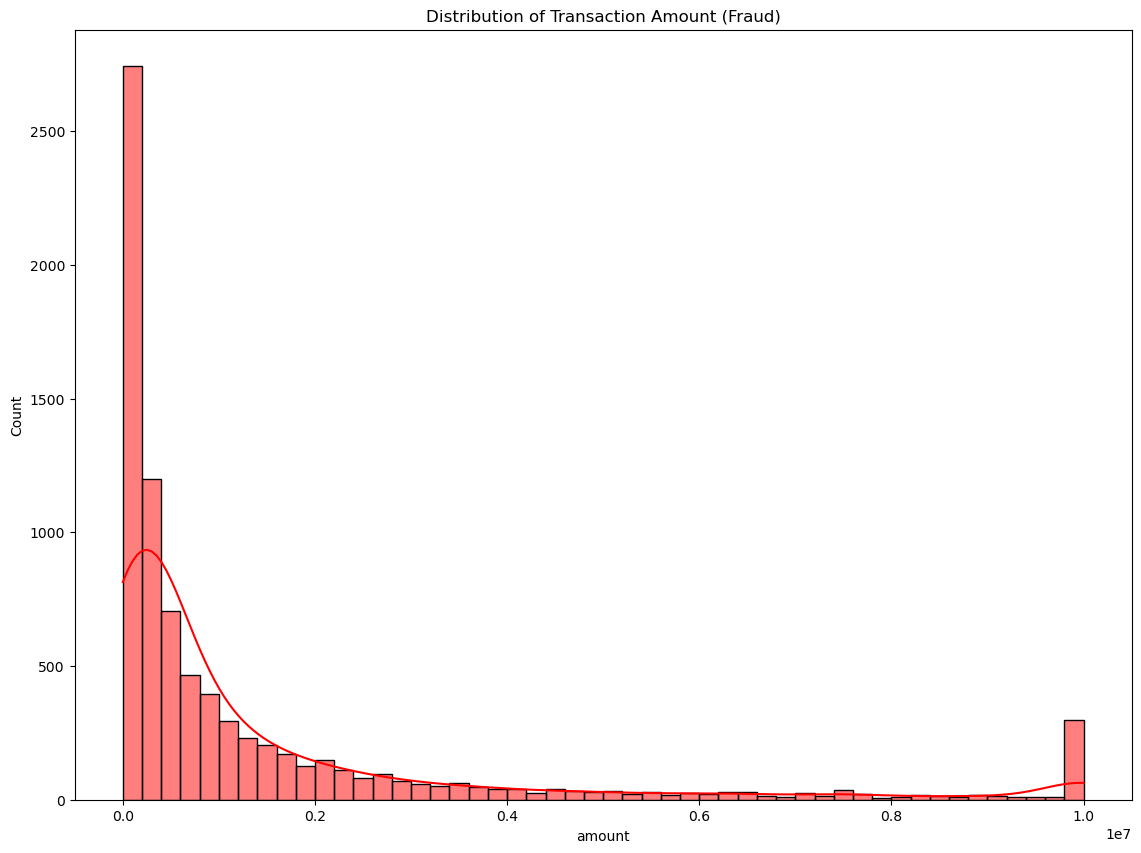

In [16]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.histplot(fraud_data["amount"],bins=50,kde=True,color="red")
plt.title("Distribution of Transaction Amount (Fraud)")

Text(0.5, 1.0, 'Distribution of Transaction Amount (Non-Fraud)')

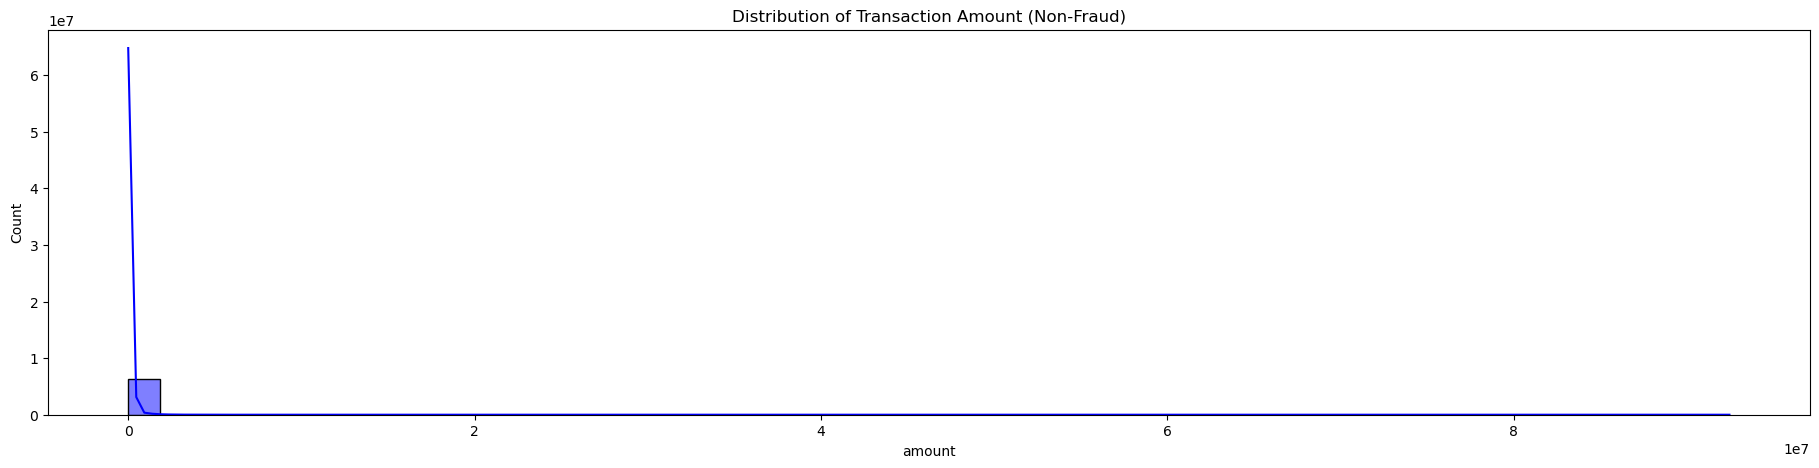

In [17]:
plt.figure(figsize=(50,5))
plt.subplot(1,2,2)
sns.histplot(non_fraud_data["amount"],bins=50,kde=True,color="blue")
plt.title("Distribution of Transaction Amount (Non-Fraud)")

C:\Users\vvsna\AppData\Local\Temp\ipykernel_5368\3482453247.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="step",y="isFraud",data=data,ci=None)


Text(0.5, 1.0, 'Fraud Rate Over Time')

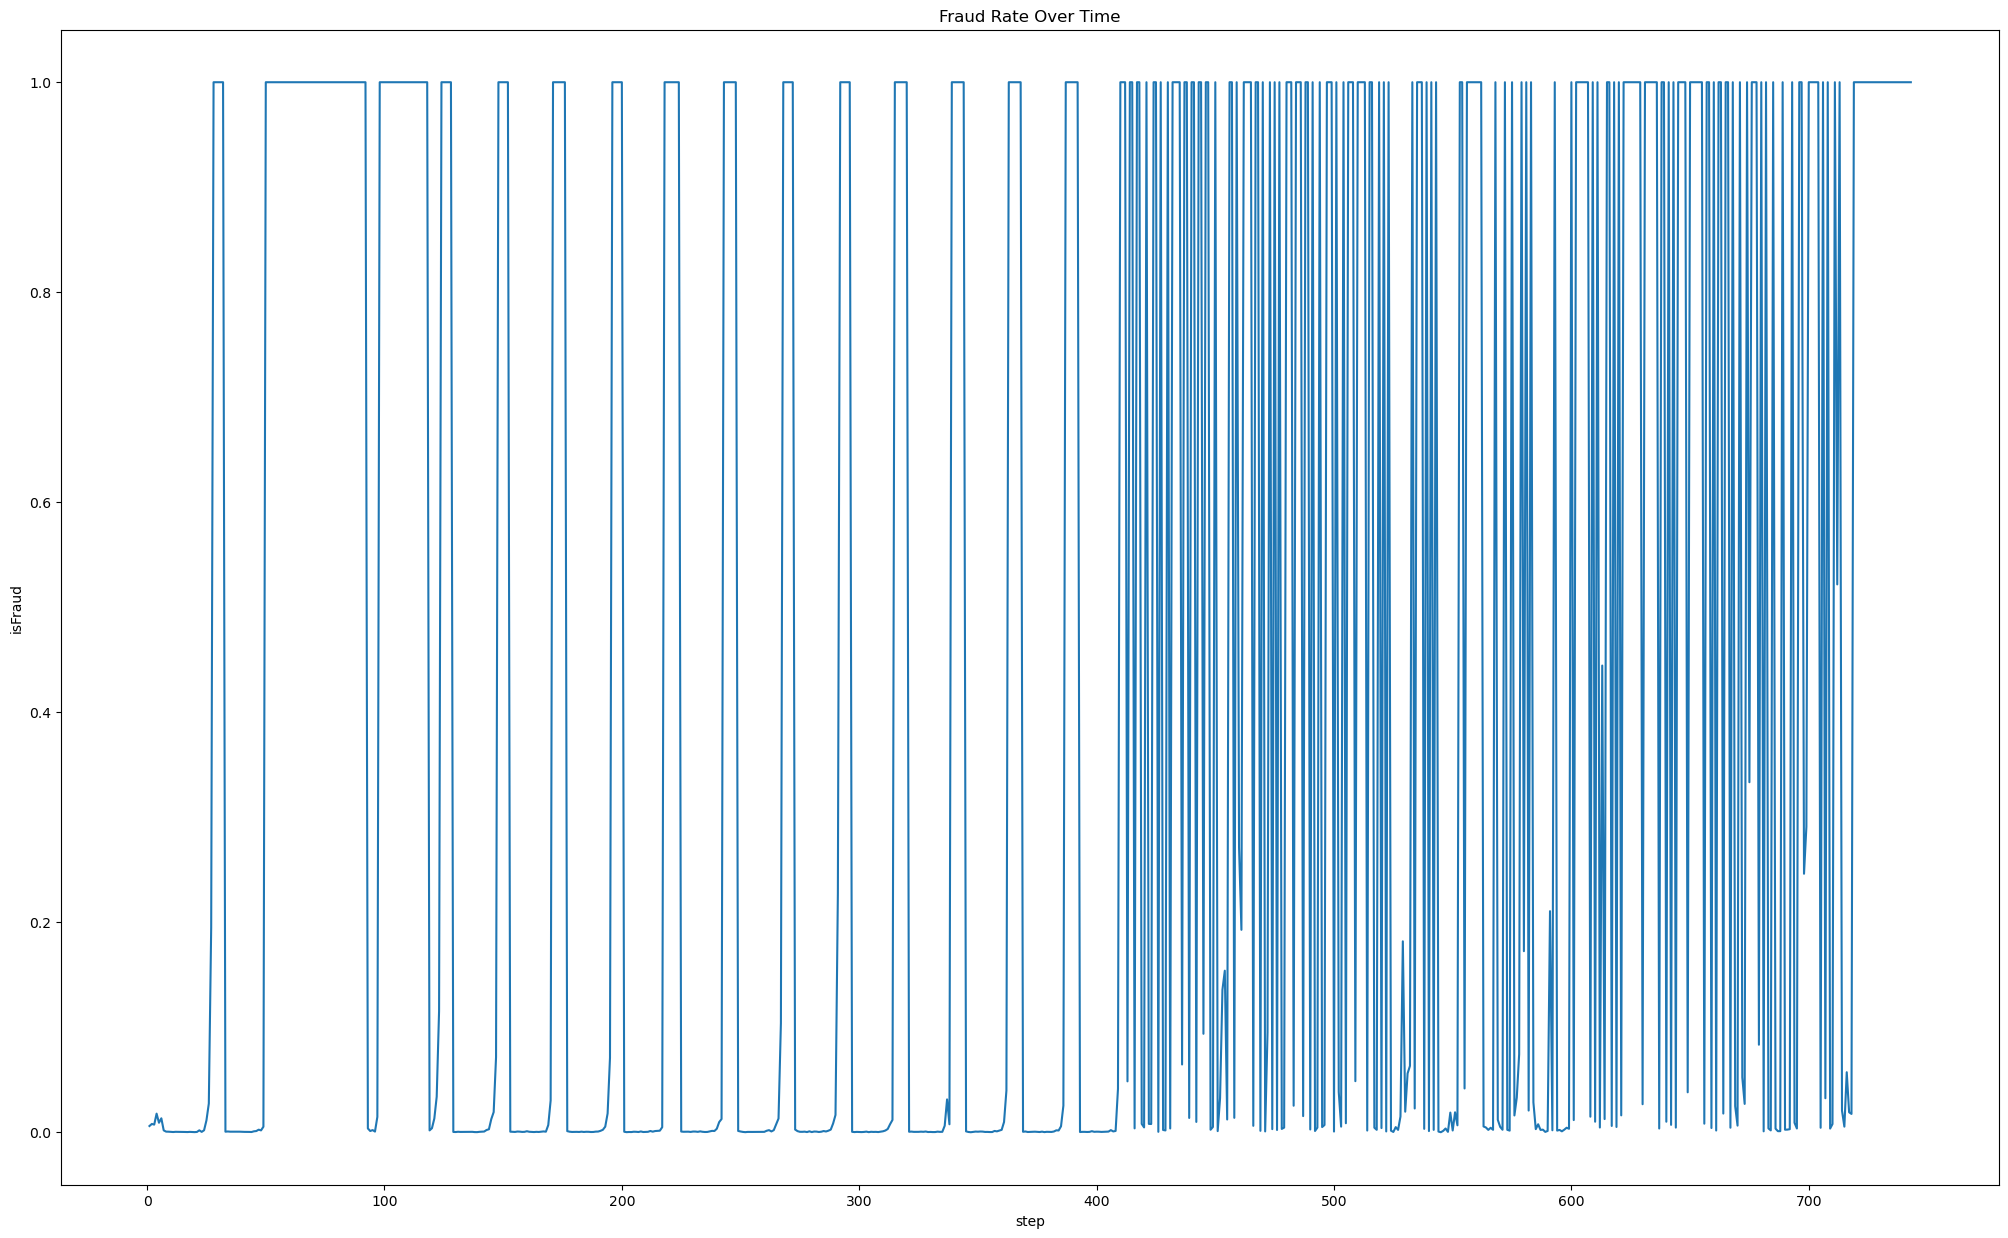

In [18]:
plt.figure(figsize=(25,15))
sns.lineplot(x="step",y="isFraud",data=data,ci=None)
plt.title("Fraud Rate Over Time")

Text(0.5, 1.0, 'Fraud Rate by Transaction Type')

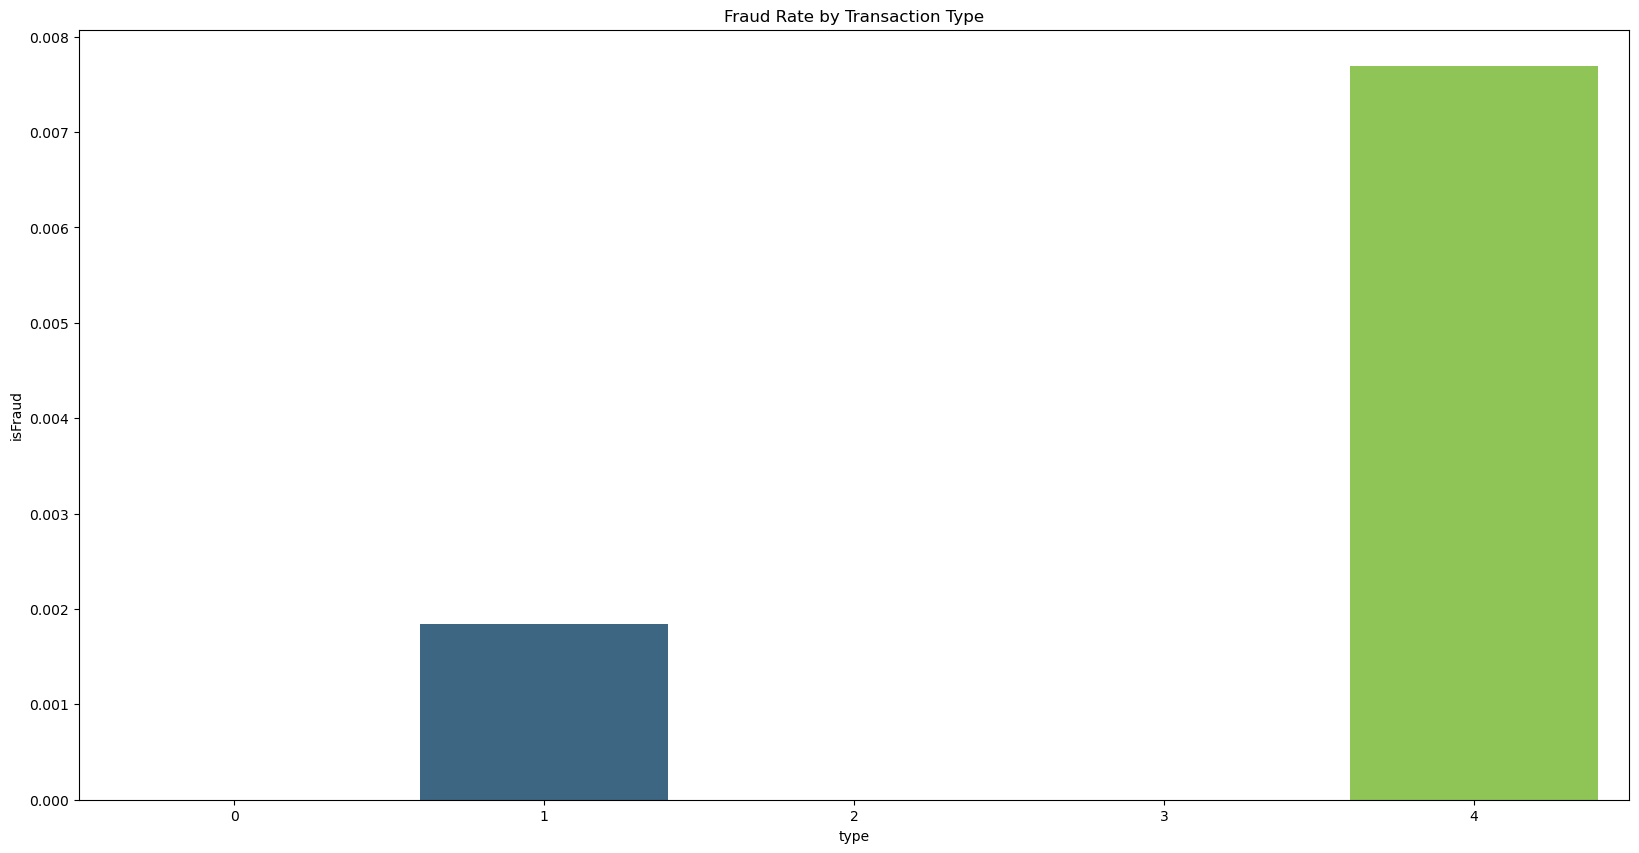

In [19]:
fraud_rate_by_type=data.groupby("type")["isFraud"].mean().reset_index()

plt.figure(figsize=(20,10))

sns.barplot(x="type",y="isFraud",data=fraud_rate_by_type,palette="viridis")
plt.title("Fraud Rate by Transaction Type")

In [20]:
data=data.drop(["nameOrig","nameDest"],axis=1)

In [21]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [22]:
X = data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]]
y = data["isFraud"]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9997084534358488

In [28]:
report=classification_report(y_test,y_pred)
print("\n",report)


               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.89      0.88      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [29]:
con=confusion_matrix(y_test,y_pred)
con

array([[1270721,     183],
       [    188,    1432]], dtype=int64)

In [30]:
new_transaction = np.array([[2, 250.0, 100.0, 150.0]])
fraud_prediction = model.predict(new_transaction)

C:\Users\vvsna\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [31]:
if fraud_prediction[0] == 1:
    print("The transaction is classified as fraudulent.")
else:
    print("The transaction is not classified as fraudulent.")

The transaction is not classified as fraudulent.
